**420-A52-SF - Algorithmes d'apprentissage supervisé - Hiver 2021 - Spécialisation technique en Intelligence Artificielle**<br/>
MIT License - Copyright (c) 2021 Mikaël Swawola
<br/>
![Travaux Pratiques - Arbres de décision](static/15-tp-banner.png)
<br/>
**Objectif:** cette séance de travaux pratiques a pour objectif la mise en oeuvre des arbres de régression et de classification. Les jeux de données utilisés seront **Hitters** (Baseball) et **Heart**

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd

## Exercice 1 - Arbres de régression

### 1-1 Chargement du jeu de données Hitters et exploration sommaire

In [2]:
dfHit = pd.read_csv("../../data/Hitters.csv")
dfHeart = pd.read_csv("../../data/Heart.csv")
dfHit.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [3]:
#dfHit.isnull().sum()
dfHeart.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [5]:
def drop_unnamed_col(pDf):
    return  pDf.loc[:, ~pDf.columns.str.contains('^Unnamed')]

In [8]:
#dfHeart = dfHeart.loc[:, ~dfHeart.columns.str.contains('^Unnamed')]
dfHeart = drop_unnamed_col(dfHeart)
dfHeart.head()

dfHit = drop_unnamed_col(dfHit)
dfHit.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [9]:
def getDfNum(pDf):
    return  pd.get_dummies(pDf, drop_first=True, prefix_sep="_")

In [10]:
def getDfXDfY(pDf, pColY):
    dfY = pd.DataFrame(pDf[pColY])
    dfX = pDf.drop([pColY], axis=1)
    return dfX, dfY


### 1-2 Suppression des observations ayant des valeurs manquantes

In [12]:
dfHit.dropna(inplace=True)
dfHeart.dropna(inplace=True)

In [7]:
#df.isnull().sum()

Unnamed: 0    0
AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary        0
NewLeague     0
dtype: int64

### 1-3 Préparation de la structure de données

In [13]:
dfHeartNum = getDfNum(dfHeart)
dfHitNum = getDfNum(dfHit)


dfXHit, dfYHit = getDfXDfY(dfHitNum, 'Salary')
dfXHeart, dfYHeart = getDfXDfY(dfHeartNum, 'AHD_Yes')



In [15]:
from sklearn.model_selection import train_test_split




### 1-4 Validation croisée Holdout 

In [33]:
### definir baseline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

In [35]:
def print_metrics(pDfX, pDfY,  pModel, pMsg):
    cross_val_scores = cross_val_score(pModel, pDfX, pDfY, cv=10)
    print("-------------")
    print(pMsg)
    print("-------------")

    print("[mse]: ", mean_squared_error(pDfY, pModel.predict(pDfX),  squared=False))
    print("[score] : ", pModel.score(pDfX, pDfY))
    print("[cross_val_scores]: ", cross_val_scores)
    print("---------------")


In [48]:

def analyze_regression(pDfX, pDfY, pAlpha=0):
    X_train, X_test, y_train, y_test = train_test_split(pDfX, pDfY
    #, stratify=True
    , test_size=0.3
    , shuffle=True
    , random_state=0
    )
    dt = tree.DecisionTreeRegressor(criterion='squared_error', random_state=2023, ccp_alpha=pAlpha)
    dt.fit(X_train, y_train)
    dt_scores = cross_val_score(dt, X_train, y_train, cv=10)

    
    
    #print("[mse]: ", mean_squared_error(y_train, dt.predict(X_train),  squared=False))
    #print("[score] : ", dt.score(X_train, y_train))
    #print("dt_scores: ", dt_scores)

    print_metrics(X_train, y_train, dt, "Train")
    print_metrics(X_test, y_test, dt, "Test")

    #text_representation = tree.export_text(dt)
    #print(text_representation)

    tree.plot_tree(dt , filled=True, rounded=True, feature_names = pDfX.columns)


    #fig = plt.figure(figsize=(25,20))
    #_ = tree.plot_tree(dt, 
    #               feature_names=pDfX.columns,  
    #               class_names=pDfY.columns,  
    #               filled=True)

### 1-5 Mise en oeuvre de l'arbre de régression

-------------
Train
-------------
[mse]:  0.0
[score] :  1.0
[cross_val_scores]:  [ 0.57432675 -0.12100967  0.41435392  0.28921308  0.56368402  0.35796435
  0.5433335  -2.71888379 -0.145061   -0.20936274]
---------------
-------------
Test
-------------
[mse]:  441.55857786236635
[score] :  0.2612772770995423
[cross_val_scores]:  [-5.89793525e-01  8.17588763e-01  6.81012679e-01 -1.47985921e-01
 -7.74195455e+00  3.84985515e-01  1.72209627e-01  3.07359473e-01
  5.69043557e-01  6.23581654e-03]
---------------


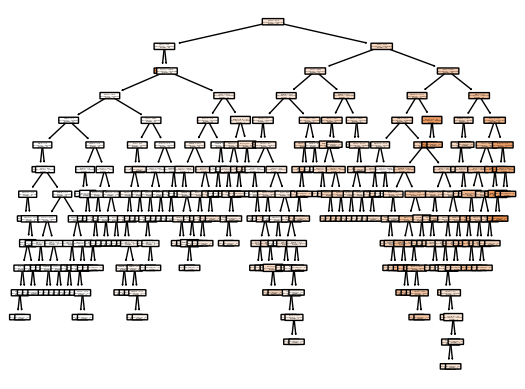

In [49]:
analyze_regression(dfXHit, dfYHit)


[class sklearn.tree.DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort='deprecated', ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

-------------
Train
-------------
[mse]:  261.18829330665164
[score] :  0.6116502278401416
[cross_val_scores]:  [ 0.46774162  0.30074426  0.55575483  0.23509599  0.84448059  0.45371772
  0.34971739 -0.266773    0.61891951 -0.09204331]
---------------
-------------
Test
-------------
[mse]:  261.18829330665164
[score] :  0.6116502278401416
[cross_val_scores]:  [ 0.46774162  0.30074426  0.55575483  0.23509599  0.84448059  0.45371772
  0.34971739 -0.266773    0.61891951 -0.09204331]
---------------


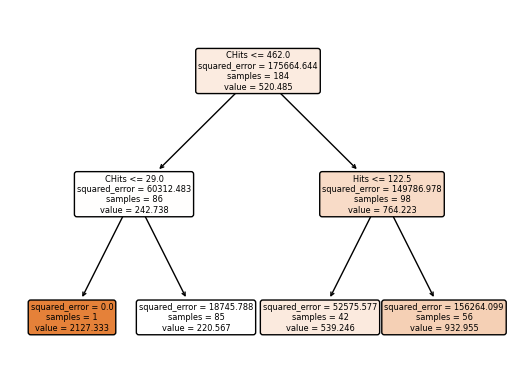

In [46]:
analyze_regression(dfXHit, dfYHit, pAlpha=12000)

### 1-6 Évaluation du modèle

### 1-7 Visualisation de l'arbre

### 1-8 Application de l'élagage et ré-évaluation du modèle

-------------
Train
-------------
[mse]:  261.18829330665164
[score] :  0.6116502278401416
[cross_val_scores]:  [ 0.46774162  0.30074426  0.55575483  0.23509599  0.84448059  0.45371772
  0.34971739 -0.266773    0.51649482 -0.09204331]
---------------
-------------
Test
-------------
[mse]:  398.4474033866647
[score] :  0.398484520489663
[cross_val_scores]:  [-0.70208447  0.85803193  0.70583908 -0.07923383 -6.23419161  0.3486051
  0.11613484  0.89409882  0.60827463  0.75386722]
---------------


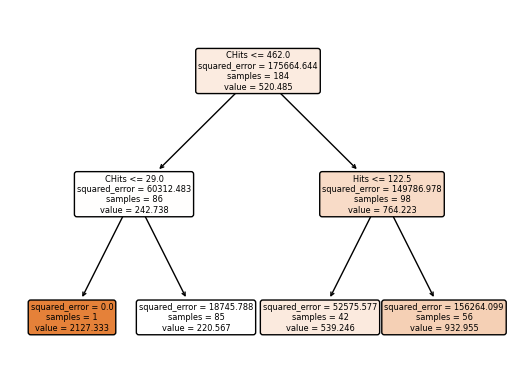

In [50]:
analyze_regression(dfXHit, dfYHit, pAlpha=15000)

### 1-9 Visualisation de l'arbre élagué

## Exercice 2 - Arbres de classification

### 2-1 Chargement et préparation du jeu de données Heart

### 2-2 Préparation de la structure de données

### 2-3 Validation croisée Holdout 

### 2-4 Mise en oeuvre de l'arbre de classification

[class sklearn.tree.DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

### 2-5 Évaluation du modèle

### 2-6 Application de l'élagage et ré-évaluation du modèle

### 2-7 Visualisation de l'arbre